In [1]:
get_ipython().magic('load_ext autoreload')
get_ipython().magic('autoreload 2')
get_ipython().magic('matplotlib inline')

In [2]:
import sys
import os

import itertools
import pathlib

import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.optimize import curve_fit


import matplotlib.pyplot as plt
import matplotlib as mpl
#from mpltools import style
import matplotlib.gridspec as gridspec
#from mpltools import layout
#from networkx import Graph
#import seaborn as sns

sys.path.append('..')
import about
import pathcustomize

from waldo.conf import settings
from waldo.wio.experiment import Experiment
from waldo.extern import multiworm 
#from multiworm.core import MWTSummaryError
#from waldo.output.speed import SpeedWriter
#from waldo.output.speed import *
#from waldo.wio.worm_writer import WormWriter
import obsevation_functions as of

plt.style.use('bmh')
about.about()

Python 2.7.9 (default, Apr 14 2015 12:54:25) [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)] on linux2, Host: cody


In [3]:
#settings.PROJECT_DATA_ROOT = '../../data/test'
settings.PROJECT_DATA_ROOT = '/home/projects/worm_movement/Data/WALDO_Data/'

#'../../data/test/20130318_131056/blob_files/'
pl = pathlib.Path(settings.PROJECT_DATA_ROOT)
print(pl.absolute())
files = {}
for i in pl.glob('*'):
    
    summary_list = list(i.glob('blob_files/*.summary'))
    if not len(summary_list):
        continue
    #print(i.name, summary_list[0].name)
    files[i.name] = summary_list[0].name.split('.summary')[0]

names = sorted(list(files.keys()))
for n in names:
    print "'{n}',".format(n=n) , '#  --', files[n]

/home/projects/worm_movement/Data/WALDO_Data
'20130702_135652', #  -- worm tracking test
'20130702_135704', #  -- worm tracking test
'20150504_123807', #  -- copper-test2
'20150505_111654', #  -- copper-A3-10worms-N2-same-plate
'20150505_150046', #  -- copper-A3-10worms-N2-new-plate
'20150506_115813', #  -- copper-A4-10worms-N2
'20150506_153738', #  -- copper-A4-5worms-N2
'20150507_103013', #  -- copper-A5-10worms-N2
'20150507_144556', #  -- copper-A5-5worms-N2
'20150508_105539', #  -- copper-A6-10worms-N2
'20150511_121312', #  -- copper-10worms-N2-day1-standard
'20150511_121317', #  -- copper-10worms-N2-day1-standard
'20150511_121322', #  -- copper-10worms-N2-day1-standard
'20150511_160114', #  -- copper-30worms-N2-day1-populationtest
'20150511_160118', #  -- copper-20worms-N2-day1-populationtest
'20150511_160123', #  -- copper-10worms-N2-day1-populationtest
'20150512_110456', #  -- copper-10worms-N2-day2-standard
'20150512_110519', #  -- copper-10worms-N2-day2-standard
'20150512_1105

In [4]:
eids = [
# '20130702_135652', #  -- worm tracking test
# '20130702_135704', #  -- worm tracking test
# '20150504_123807', #  -- copper-test2
# '20150505_111654', #  -- copper-A3-10worms-N2-same-plate
# '20150505_150046', #  -- copper-A3-10worms-N2-new-plate
# '20150506_115813', #  -- copper-A4-10worms-N2
# '20150506_153738', #  -- copper-A4-5worms-N2
# '20150507_103013', #  -- copper-A5-10worms-N2
# '20150507_144556', #  -- copper-A5-5worms-N2
# '20150508_105539', #  -- copper-A6-10worms-N2
'20150511_121312', #  -- copper-10worms-N2-day1-standard
'20150511_121317', #  -- copper-10worms-N2-day1-standard
#'20150511_121322', #  -- copper-10worms-N2-day1-standard --- ?
    
# '20150511_160114', #  -- copper-30worms-N2-day1-populationtest
# '20150511_160118', #  -- copper-20worms-N2-day1-populationtest
'20150511_160123', #  -- copper-10worms-N2-day1-populationtest
# '20150512_110456', #  -- copper-10worms-N2-day2-standard
# '20150512_110519', #  -- copper-10worms-N2-day2-standard
# '20150512_110526', #  -- copper-10worms-N2-day2-standard
# '20150512_165039', #  -- copper-60worms-N2-day2-populationtest
# '20150512_165044', #  -- copper-50worms-N2-day2-populationtest
# '20150512_165052', #  -- copper-40worms-N2-day2-populationtest
# '20150513_112911', #  -- copper-10worms-N2-day3-standard_B
# '20150513_112917', #  -- copper-10worms-N2-day3-standard_A
# '20150513_144241', #  -- copper-10worms-N2-day3-standard
# '20150513_144253', #  -- copper-10worms-N2-day3-standard
# '20150513_144302', #  -- copper-10worms-N2-day3-standard
# '20150514_121513', #  -- copper-10worms-N2-day4-standard_C
# '20150514_121515', #  -- copper-10worms-N2-day4-standard_B
# '20150514_121528', #  -- copper-10worms-N2-day4-standard_A
# '20150514_164158', #  -- copper-10worms-N2-day4-standard_A
# '20150514_164204', #  -- copper-10worms-N2-day4-standard_C
# '20150515_124728', #  -- copper-10worms-N2-day5-standard_B
# '20150515_124736', #  -- copper-10worms-N2-day5-standard_C
# '20150515_124840', #  -- copper-10worms-N2-day5-standard_A_Correct
# '20150515_155539', #  -- copper-10worms-N2-day5-standard_A
# '20150515_155545', #  -- copper-10worms-N2-day5-standard_C
# '20150518_121756', #  -- copper-10worms-N2-day1-standard_15degree
# '20150518_121757', #  -- copper-10worms-N2-day1-standard_15degree
# '20150518_121809', #  -- copper-10worms-N2-day1-standard_15degree
# '20150518_182452', #  -- copper-10worms-N2-day1-standard_25degree
# '20150518_182454', #  -- copper-10worms-N2-day1-standard_25degree
# '20150518_182501', #  -- copper-10worms-N2-day1-standard_25degree
# '20150519_122411', #  -- copper-10worms-N2-day2-nofood
# '20150519_122413', #  -- copper-10worms-N2-day2-standard
# '20150519_122420', #  -- copper-10worms-N2-day2-standard
# '20150519_170520', #  -- copper-10worms-N2-day2-standard
# '20150519_170525', #  -- copper-10worms-N2-day2-nofood
# '20150519_170530', #  -- copper-10worms-N2-day2-nofood
# '20150602_112810', #  -- fullday-9worms-N2-day2-groupC
# '20150608_121717', #  -- copper-30worms-N2-day1-standard
'20150608_121725', #  -- copper-10worms-N2-day1-standard
# '20150608_121812', #  -- copper-50worms-N2-day1-standard
# '20150608_165515', #  -- copper-40worms-N2-day1-standard
# '20150608_165523', #  -- copper-60worms-N2-day1-standard
# '20150608_165610', #  -- copper-20worms-N2-day1-standard
# '20150615_124720', #  -- copper-10worms-N2-day1-25degrees
# '20150615_124728', #  -- copper-10worms-N2-day1-25degrees
# '20150615_124738', #  -- copper-10worms-N2-day1-25degrees
# '20150615_170747', #  -- copper-10worms-N2-day1-15degrees
# '20150615_170754', #  -- copper-10worms-N2-day1-15degrees
# '20150615_170759', #  -- copper-10worms-N2-day1-15degrees
'20150622_121933', #  -- copper-40worms-N2-day1-standard
'20150622_121935', #  -- copper-20worms-N2-day1-standard
'20150622_121940', #  -- copper-60worms-N2-day1-standard
# '20150625_132445', #  -- copper-10worms-N2-day1-25 degree
# '20150625_132449', #  -- copper-10worms-N2-day1-25degree
# '20150625_180232', #  -- copper-10worms-N2-day1-15degree
# '20150625_180236', #  -- copper-10worms-N2-day1-15degree
# '20150626_111849', #  -- copper-60worms-N2-day1-standard
# '20150626_111855', #  -- copper-40worms-N2-day1-standard
# '20150626_173234', #  -- copper-30worms-N2-day1-standard
# '20150626_173245', #  -- copper-50worms-N2-day1-standard
# '20150626_173250', #  -- copper-20worms-N2-day1-standard
# '20150629_113741', #  -- copper-40worms-N2-day1-standard
# '20150629_113757', #  -- copper-20worms-N2-day1-standard
# '20150629_113803', #  -- copper-50worms-N2-day1-standard
'20150629_165904', #  -- copper-10worms-N2-day1-standard
# '20150629_165915', #  -- copper-60worms-N2-day1-standard
# '20150629_165920', #  -- copper-30worms-N2-day1-standard
# '20150702_113855', #  -- copper-10worms-N2-day1-males
# '20150702_113859', #  -- copper-10worms-N2-day1-males
'20150702_150024', #  -- copper-10worms-N2-day1-standard
# '20150702_150028', #  -- copper-10worms-N2-day1-males         
             ]


rt = eids


In [5]:
# 25 C plots!
h1 = [
    '20150518_182454',  # copper-10worms-N2-day1-standard_25degree
    '20150518_182501',  # copper-10worms-N2-day1-standard_25degree
    '20150518_182452',  # copper-10worms-N2-day1-standard_25degree
    ]
    
    
c1 = ['20150518_121756', # copper-10worms-N2-day1-standard_15degree
      '20150518_121757', # copper-10worms-N2-day1-standard_15degree
      '20150518_121809',  # copper-10worms-N2-day1-standard_15degree
    ]

h2 = [
'20150615_124720', # 	10 	copper-10worms-N2-day1-25degrees 	180
'20150615_124728', # 	10 	copper-10worms-N2-day1-25degrees 	180
'20150615_124738', # 	10 	copper-10worms-N2-day1-25degrees 	180
]
c2 = [
'20150615_170747', # 	10 	copper-10worms-N2-day1-15degrees 	180
'20150615_170754', # 	10 	copper-10worms-N2-day1-15degrees 	180
'20150615_170759', # 	10 	copper-10worms-N2-day1-15degrees 	180
]

h3 = [
'20150625_132445', #  -- copper-10worms-N2-day1-25 degree
#'20150625_132448', #  -- copper-10worms-N2-day1-25degree  -- Weirdness! huge speed spike in beginning
'20150625_132449', #  -- copper-10worms-N2-day1-25degree    
    
]
c3 = [

'20150625_180232', #  -- copper-10worms-N2-day1-15degree
#'20150625_180236', #  -- copper-10worms-N2-day1-15degree
'20150625_180237', #  -- copper-10worms-N2-day1-15degree

]

h = h1 + h2 + h3
c = c1 + c2 + c3
print('hot')
print(h)
print('cold')
print(c)

# eids = [
# '20150518_182452', #  -- copper-10worms-N2-day1-standard_25degree
# '20150518_182454', #  -- copper-10worms-N2-day1-standard_25degree
# '20150518_182501', #  -- copper-10worms-N2-day1-standard_25degree
# '20150615_124720', #  -- copper-10worms-N2-day1-25degrees
# '20150615_124728', #  -- copper-10worms-N2-day1-25degrees
# '20150615_124738', #  -- copper-10worms-N2-day1-25degrees
    
# '20150625_132445', #  -- copper-10worms-N2-day1-25 degree
# #'20150625_132449', #  -- copper-10worms-N2-day1-25degree   <---- something weird is happening 
#              ]
#eids = c


all_eids = rt + h + c

hot
['20150518_182454', '20150518_182501', '20150518_182452', '20150615_124720', '20150615_124728', '20150615_124738', '20150625_132445', '20150625_132449']
cold
['20150518_121756', '20150518_121757', '20150518_121809', '20150615_170747', '20150615_170754', '20150615_170759', '20150625_180232', '20150625_180237']


In [6]:
def clear_eid_caches(eids, data_type='behavior'):
    for eid in eids:
        cache = of.BehaviorCacher(eid=eid)
        bids = cache.type_bids(data_type)
        for bid in bids:
            cache.delete(bid=bid, data_type=data_type)
        print(eid,bids)
#clear_eid_caches(eids)

# Load Data
### pull data without truncating first part of recording

In [7]:
eids = rt #all_eids

def get_track_dfs(eids):
    track_dfs = of.pull_tracks_for_eids(eids=eids, path=pl)
    tdfs = {}
    for bid in track_dfs:
        df = track_dfs[bid]

        if df is None or not len(df):
            continue

        t0 = df['time'].iloc[0]
        df['t'] = df['time'] - t0
        df['avg'] = df['bl / s'].cumsum() / np.arange(1, len(df)+1)
        tdfs[bid] = df[['time', 't', 'avg', 'bl / s', 'minutes']]

    dfs_full = tdfs
    return dfs_full

print('20C')
dfs_20 = get_track_dfs(eids=rt)
print('\n15C')
dfs_15 = get_track_dfs(eids=c)
print('\n25C')
dfs_25 = get_track_dfs(eids=h)

20C
retreiving cached tracks for 20150511_121312
retreiving cached tracks for 20150511_121317
retreiving cached tracks for 20150511_160123
retreiving cached tracks for 20150608_121725
retreiving cached tracks for 20150622_121933
retreiving cached tracks for 20150622_121935
retreiving cached tracks for 20150622_121940
retreiving cached tracks for 20150629_165904
retreiving cached tracks for 20150702_150024
('\n', 302, ' tracks in total')

15C
retreiving cached tracks for 20150518_121756
retreiving cached tracks for 20150518_121757
retreiving cached tracks for 20150518_121809
retreiving cached tracks for 20150615_170747
retreiving cached tracks for 20150615_170754
retreiving cached tracks for 20150615_170759
retreiving cached tracks for 20150625_180232
retreiving cached tracks for 20150625_180237
('\n', 120, ' tracks in total')

25C
retreiving cached tracks for 20150518_182454
retreiving cached tracks for 20150518_182501
retreiving cached tracks for 20150518_182452
retreiving cached trac

In [12]:
def get_average_decay(track_dfs):
    dfs = track_dfs
    track_ids = list(dfs.keys())

    full_data = [df for bid, df 
                 in track_dfs.items()]


    # create the 
    fdf = pd.concat(full_data, axis=0)
    fdf['m'] = np.array(fdf['minutes'], dtype=int)
    avg = pd.pivot_table(fdf, values='bl / s', columns='m', aggfunc=np.mean)
    counts = pd.pivot_table(fdf, values='bl / s', columns='m', aggfunc=len)
    return avg, counts
    
    
avg20, counts20 = get_average_decay(track_dfs = dfs_20)
avg15, counts15 = get_average_decay(track_dfs = dfs_15)
avg25, counts25 = get_average_decay(track_dfs = dfs_25)

In [13]:
def pull_long_tracks(track_dfs, start_cut=5, end_cut=140):
    # figure out which tracks last a long time
    long_track_ids = []

    for track in track_dfs: #track_ids:
        df = track_dfs[track]
        #print('track: {bid} \t| len:{l}'.format(bid=track, l=len(df)))
        #fig = plt.figure(figsize=(10, 1))
        start_time, end_time = min(df['minutes']), max(df['minutes'])
        #print(start_time, end_time)

        if end_time - start_time < end_cut:
            continue
        if start_time > start_cut:
            continue
        #s = df['bl / s']
        #if max(s) < 0.05:
        #    continue
        long_track_ids.append(track)
    
    print(len(long_track_ids), 'tracks match criterion')
    return long_track_ids



start_cut=5
end_cut=140

long_tracks_20 =   pull_long_tracks(track_dfs=dfs_20, start_cut=start_cut, end_cut=end_cut)
long_tracks_15 =   pull_long_tracks(track_dfs=dfs_15, start_cut=start_cut, end_cut=end_cut)
long_tracks_25 =   pull_long_tracks(track_dfs=dfs_25, start_cut=start_cut, end_cut=end_cut)

(22, 'tracks match criterion')
(34, 'tracks match criterion')
(25, 'tracks match criterion')


#Fig. 4a

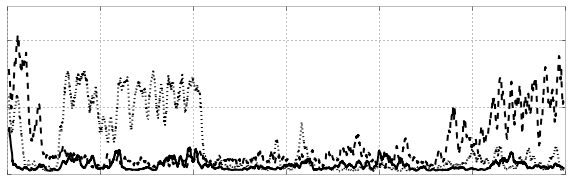

In [33]:
def plot_tracks2(track_list, savename=None, lstyles=None):


#     ax.set_xlabel('time (min)', size=20)
#     ax.set_ylabel('speed (bl / s)', size=20)
#     plt.yticks(fontsize=15)
#     plt.xticks(fontsize=15)
    if savename:
        plt.savefig(savename)
    plt.show()

dfs = dfs_20
track_list = [dfs[t_id] for t_id in ['20150702_150024-6',
                                     '20150511_160123-3',        
                                     '20150622_121935-4'
                                    ]]

fig = plt.figure(figsize=(10,3))
ax = plt.subplot(axisbg='white')



df = track_list[0]
df2 = pd.rolling_mean(df, window=60)
ax.plot(df2['minutes'], df2['bl / s'], '-', color='k')

df = track_list[1]
df2 = pd.rolling_mean(df, window=60)
ax.plot(df2['minutes'], df2['bl / s'], ':', color='k')

df = track_list[2]
df2 = pd.rolling_mean(df, window=60)[::5]
ax.plot(df2['minutes'], df2['bl / s'], '--',  color='k')


#ax.plot(x, y, 'o', alpha=0.8, label="All Animals -- Binned Data", color='tomato')
#ax.plot(x, expon_func(x, *params), '-', lw=4, label="All Animals -- Fitted Curve", color='k',)
#ax.plot(x, y, 'o', alpha=0.8, color='tomato')
# ['-' | '--' | '-.' | ':' | 'None' | ' ' | '']



ax.set_ylim([0, 0.25])    
tick_label_size = 24    
plt.xticks([0, 30, 60, 90, 120, 150, 180], [0, 30, 60, 90, 120, 150, 180], fontsize=tick_label_size)
plt.yticks([0, 0.1, 0.2], [0, 0.1, 0.2], fontsize=tick_label_size)
plt.xticks([0, 30, 60, 90, 120, 150, 180], [], fontsize=tick_label_size)
plt.yticks([0, 0.1, 0.2], [], fontsize=tick_label_size)
plt.savefig('individuals-all_black.eps')
    


#Fig. 4b

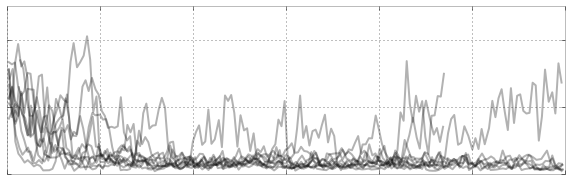

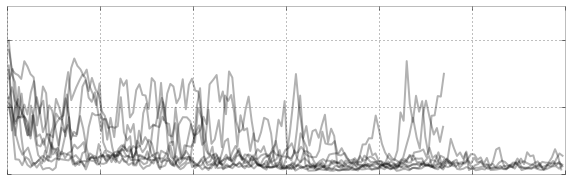

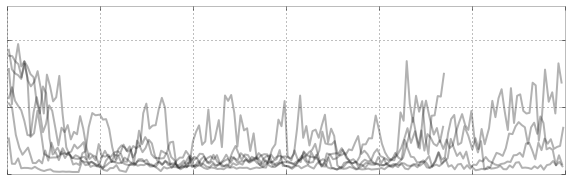

In [70]:
def bin_track_plot(dfs, track_ids, p=0):
    bins = {'0-30':0,
            '30-80':0,
            '80+':0, }

    fig = plt.figure(figsize=(10,3))
    ax = plt.subplot(axisbg='white')
                
    
    for tid in track_ids:
        df = dfs[tid]
        df2 = pd.rolling_mean(df, window=60)

        if p==0:
            b1_df = df2[df['minutes'] < 30]
            b1_len = len(b1_df)
            b1_act = len(b1_df[df['bl / s'] > 0.06])

        if p == 1: 
            b1_df = df2[df['minutes'] >= 30][df['minutes'] < 90]
            b1_len = len(b1_df)
            b1_act = len(b1_df[df['bl / s'] > 0.06])


        if p==2:
            b1_df = df2[df['minutes'] >= 90]
            b1_len = len(b1_df)
            b1_act = len(b1_df[df['bl / s'] > 0.06])
         
            
            
            
        #print(b1_act, 1.0 * b1_act / b1_len)
        if b1_act > 300:
        #if b1_act <= 300:
            bins['0-30'] += 1
            if bins['0-30'] > 10:
                continue

            df2 = df2[::60]
            ax.plot(df2['minutes'], df2['bl / s'], color='k', alpha=0.3)
            

    ax.set_ylim([0, 0.25])    
    tick_label_size = 24    
    plt.xticks([0, 30, 60, 90, 120, 150, 180], [0, 30, 60, 90, 120, 150, 180], fontsize=tick_label_size)
    plt.yticks([0, 0.1, 0.2], [0, 0.1, 0.2], fontsize=tick_label_size)
    plt.xticks([0, 30, 60, 90, 120, 150, 180], [], fontsize=tick_label_size)
    plt.yticks([0, 0.1, 0.2], [], fontsize=tick_label_size)
    
    #ax.set_ylabel('speed (bl / s)')
    #ax.set_xlabel('time (min)')
    plt.savefig('reduced_T20-on-noticks-{p}.eps'.format(p=p))
    plt.show()
    
bin_track_plot(dfs=dfs_20, track_ids=long_tracks_20, p=0)
bin_track_plot(dfs=dfs_20, track_ids=long_tracks_20, p=1)
bin_track_plot(dfs=dfs_20, track_ids=long_tracks_20, p=2)

#Fig. 4c

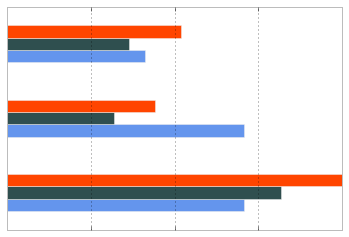

In [51]:
def bin_tracks(dfs, track_ids):
    bins = {'0-30':0,
            '30-80':0,
            '80+':0, }

    for tid in track_ids:
        df = dfs[tid]
        df2 = pd.rolling_mean(df, window=60)

        b1_df = df2[df['minutes'] < 30]
        b1_len = len(b1_df)
        b1_act = len(b1_df[df['bl / s'] > 0.06])

        #print(b1_act, 1.0 * b1_act / b1_len)
        if b1_act > 300:
            bins['0-30'] += 1



        b1_df = df2[df['minutes'] >= 30][df['minutes'] < 80]
        b1_len = len(b1_df)
        b1_act = len(b1_df[df['bl / s'] > 0.06])
        #print(b1_act, 1.0 * b1_act / b1_len)
        if b1_act > 300:
            bins['30-80'] += 1    

        b1_df = df2[df['minutes'] >= 80]
        b1_len = len(b1_df)
        b1_act = len(b1_df[df['bl / s'] > 0.06])
        #print(b1_act, 1.0 * b1_act / b1_len)
        if b1_act > 300:
            bins['80+'] += 1

        #plt.plot(b1_df['minutes'], b1_df['bl / s'])
        #plt.show()
    for i in bins:
        bins[i] = float(bins[i]) / len(track_ids)
    return bins


bins15 = bin_tracks(dfs=dfs_15, track_ids=long_tracks_15)
bins20 = bin_tracks(dfs=dfs_20, track_ids=long_tracks_20)
bins25 = bin_tracks(dfs=dfs_25, track_ids=long_tracks_25)

bin_df = pd.DataFrame([bins15, bins20, bins25], index=['15 C', '20 C', '25 C'])


fig = plt.figure()
ax = plt.subplot(axisbg='white')
bin_df.T.plot(kind='barh', ax=ax, colors=['cornflowerblue', 'darkslategrey', 'orangered'], legend=False)
#ax.set_ylabel('fraction of worms')
#bin_df
plt.xticks([.25, .50, .75], [])
plt.yticks([], []) #, fontsize=tick_label_size)

plt.savefig('group_comparison_no_label.eps')

# number of fragments tested

In [40]:
def pull_long_tracks(track_dfs, start_cut=5, end_cut=140):
    # figure out which tracks last a long time
    long_track_ids = []

    for track in track_dfs: #track_ids:
        df = track_dfs[track]
        #print('track: {bid} \t| len:{l}'.format(bid=track, l=len(df)))
        #fig = plt.figure(figsize=(10, 1))
        start_time, end_time = min(df['minutes']), max(df['minutes'])
        #print(start_time, end_time)

        if end_time - start_time < end_cut:
            continue
        if start_time > start_cut:
            continue
        #s = df['bl / s']
        #if max(s) < 0.05:
        #    continue
        long_track_ids.append(track)
    
    print(len(long_track_ids), 'tracks match criterion')
    return long_track_ids


print('start')
start_cut=5
end_cut=25

start_15 =   pull_long_tracks(track_dfs=dfs_15, start_cut=start_cut, end_cut=end_cut)
start_20 =   pull_long_tracks(track_dfs=dfs_20, start_cut=start_cut, end_cut=end_cut)
start_25 =   pull_long_tracks(track_dfs=dfs_25, start_cut=start_cut, end_cut=end_cut)



print('mid')
start_cut=35
end_cut=85

mid_20 =   pull_long_tracks(track_dfs=dfs_20, start_cut=start_cut, end_cut=end_cut)
mid_15 =   pull_long_tracks(track_dfs=dfs_15, start_cut=start_cut, end_cut=end_cut)
mid_25 =   pull_long_tracks(track_dfs=dfs_25, start_cut=start_cut, end_cut=end_cut)


print('end')
start_cut=95
end_cut=155

end_15 =   pull_long_tracks(track_dfs=dfs_15, start_cut=start_cut, end_cut=end_cut)
end_20 =   pull_long_tracks(track_dfs=dfs_20, start_cut=start_cut, end_cut=end_cut)
end_25 =   pull_long_tracks(track_dfs=dfs_25, start_cut=start_cut, end_cut=end_cut)

start
(60, 'tracks match criterion')
(42, 'tracks match criterion')
(36, 'tracks match criterion')
mid
(62, 'tracks match criterion')
(45, 'tracks match criterion')
(59, 'tracks match criterion')
end
(36, 'tracks match criterion')
(35, 'tracks match criterion')
(52, 'tracks match criterion')


#experimental figure designs

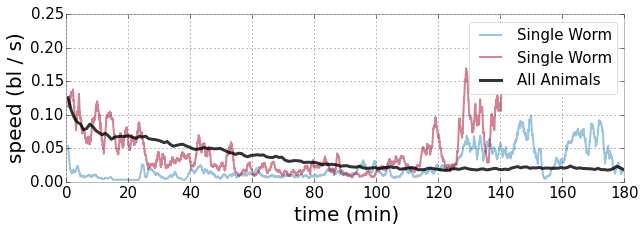

NameError: name 'gradual' is not defined

In [10]:
def plot_tracks(track_list, avg=None, savename=None):

    fig = plt.figure(figsize=(10,3))
    ax = plt.subplot(axisbg='white')

    for df in track_list:
        df2 = pd.rolling_mean(df, window=60)
        ax.plot(df2['minutes'], df2['bl / s'], '-', alpha=0.5, label='Single Worm')


    if avg is not None:
        x = np.array(avg.index) + 0.5
        y = np.array(avg)
        ax.plot(x, y, '-', alpha=0.8, lw=3, label="All Animals", color='k')

    #ax.plot(x, y, 'o', alpha=0.8, label="All Animals -- Binned Data", color='tomato')
    #ax.plot(x, expon_func(x, *params), '-', lw=4, label="All Animals -- Fitted Curve", color='k',)
    #ax.plot(x, y, 'o', alpha=0.8, color='tomato')

    ax.set_ylim([0, .25])
    legend = ax.legend(fontsize=15)
    frame = legend.get_frame()
    frame.set_facecolor('white')
    ax.set_xlabel('time (min)', size=20)
    ax.set_ylabel('speed (bl / s)', size=20)
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    if savename:
        plt.savefig(savename)
    plt.show()

    
track_list = [dfs_20[t_id] for t_id in ['20150511_160123-6','20150702_150024-1']]
plot_tracks(track_list, avg=avg20)    
    
track_list = [dfs_20[t_id] for t_id in gradual]
plot_tracks(track_list, avg=avg25)    
        
    

 ----   20 C ---- 


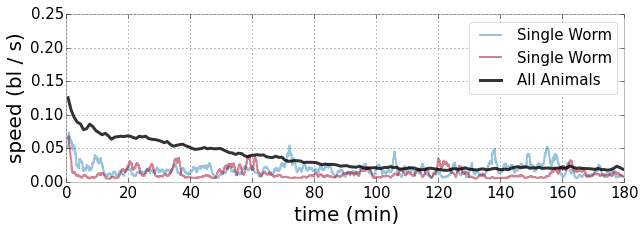

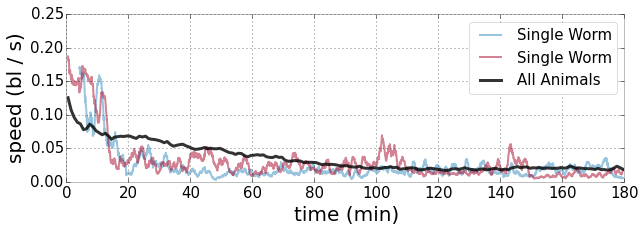

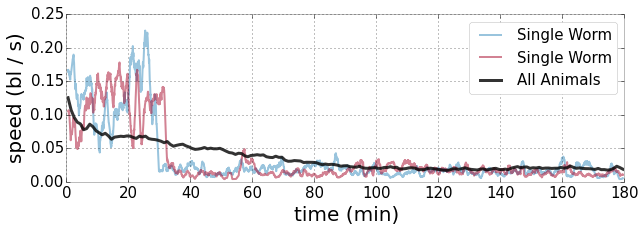

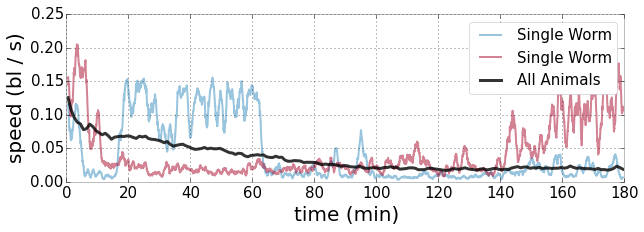

In [14]:
# 20 C groupings

cats20 = {
'000' : [
    '20150622_121935-19',
    '20150702_150024-6',    
    '20150622_121940-4',
    '20150608_121725-11',

    ],
'001' : [
        ],
'010' : [
    '20150511_121317-61',
    #'20150702_150024-8 ',   
    '20150629_165904-2',
    '20150622_121935-20',
        
        
        ],
'020' : [
    #'20150511_121317-6 ', 
    '20150622_121935-6',
    '20150629_165904-40',
    '20150622_121935-21',
    '20150608_121725-1',   
    '20150511_121317-61',
           
        ],
    
    
'030' : [
    '20150622_121935-10',
    '20150622_121935-22',
        
        ],
'040' : [
    '20150622_121935-40', 

        
        ],
'060' : [
        
        
    ],
'100' : [
    #'20150608_121725-6 ',  

    ],
'120' : [
        
        
    ],
'switches' : [
    '20150511_160123-3',        
         '20150622_121935-4',
         '20150702_150024-1',
       '20150511_160123-6',
    '20150702_150024-4',

   
    ],
}

avg=avg20
cats=cats20
dfs = dfs_20

# for i in cats:
#     print(i)
#     for tid in cats[i]:
#         print tid, tid in long_tracks_20

print(' ----   20 C ---- ')


track_list = [dfs[t_id] for t_id in cats['000'][:2]]
plot_tracks(track_list, avg=avg, savename='samp-20C-1.png')   

track_list = [dfs[t_id] for t_id in cats['010'][:2]]
plot_tracks(track_list, avg=avg, savename='samp-20C-2.png')    

track_list = [dfs[t_id] for t_id in cats['030'][:2]]
plot_tracks(track_list, avg=avg, savename='samp-20C-3.png')    

track_list = [dfs[t_id] for t_id in cats['switches'][:2]]
plot_tracks(track_list, avg=avg, savename='samp-20C-4.png')    

#long_tracks_20

In [ ]:
def plot_tracks2(track_list, savename=None, colors=None):

    fig = plt.figure(figsize=(10,3))
    ax = plt.subplot(axisbg='white')

    
    for i, df in enumerate(track_list):
        if colors:
            c = colors[i]
        else:
            c = ax._get_lines.color_cycle.next()

        df2 = pd.rolling_mean(df, window=60)
        ax.plot(df2['minutes'], df2['bl / s'], '-', alpha=0.5, color=c)

    #ax.plot(x, y, 'o', alpha=0.8, label="All Animals -- Binned Data", color='tomato')
    #ax.plot(x, expon_func(x, *params), '-', lw=4, label="All Animals -- Fitted Curve", color='k',)
    #ax.plot(x, y, 'o', alpha=0.8, color='tomato')

    
    ax.set_ylim([0, 0.25])    
    tick_label_size = 24    
    plt.xticks([0, 30, 60, 90, 120, 150, 180], [0, 30, 60, 90, 120, 150, 180], fontsize=tick_label_size)
    plt.yticks([0, 0.1, 0.2], [0, 0.1, 0.2], fontsize=tick_label_size)
    plt.xticks([0, 30, 60, 90, 120, 150, 180], [], fontsize=tick_label_size)
    plt.yticks([0, 0.1, 0.2], [], fontsize=tick_label_size)
    
    
#     ax.set_ylim([0, .25])
#     ax.set_xlabel('time (min)', size=20)
#     ax.set_ylabel('speed (bl / s)', size=20)
#     plt.yticks(fontsize=15)
#     plt.xticks(fontsize=15)
    if savename:
        plt.savefig(savename)
    plt.show()

dfs = dfs_20
track_list = [dfs[t_id] for t_id in ['20150702_150024-6',
                                     '20150511_160123-3',        
                                     '20150622_121935-4'
                                    ]]

colors = ['darkred', 'darkgreen', 'goldenrod']
plot_tracks2(track_list, savename='individual_differences_colors_noticks.eps', colors=colors)

 ----   25 C ---- 


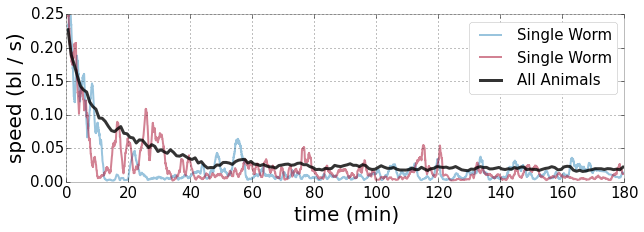

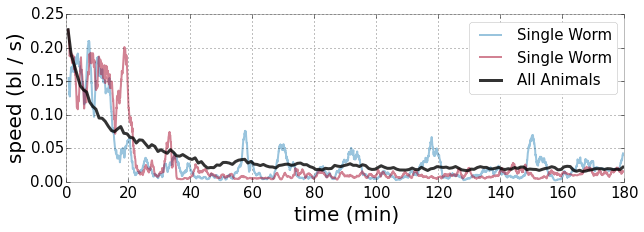

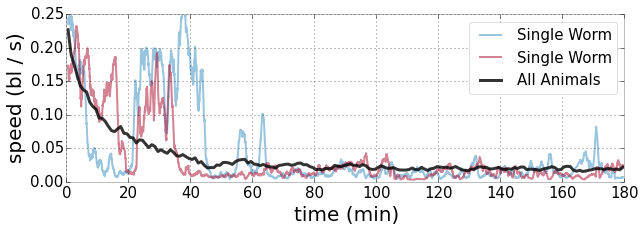

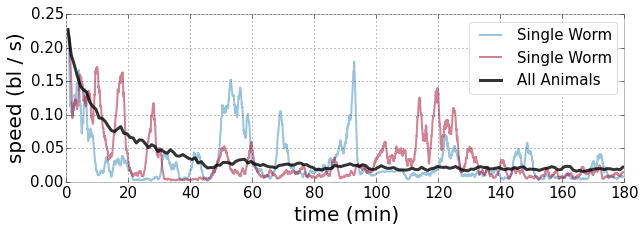

In [20]:
# 25 C groupings

cats25 = {
'000' : [

        '20150625_132445-5',
        ],
'010' : [
        '20150518_182454-6',
        '20150518_182454-5',
        '20150625_132445-8',
        '20150615_124720-1',
        
        
        ],
'020' : [
        '20150518_182454-1',
        '20150615_124728-4',
        '20150625_132445-9',
        '20150518_182452-4',
        '20150518_182452-2',
        '20150518_182452-9',
        '20150518_182452-68',
        '20150625_132445-11',
        '20150625_132445-13',
        ],
    
    
'030' : [
        '20150518_182501-65',
        '20150518_182452-10',
        
        ],
'040' : [
        '20150615_124728-5',
        '20150615_124728-10',
        '20150615_124728-12',
        '20150615_124728-8',
        
        ],
'060' : [
        
        
    ],
'100' : [
        '20150625_132445-2',
        '20150615_124720-3',
        '20150518_182452-8',
    ],
'120' : [
        
        
    ],
'switches' : [
        '20150518_182452-3',
        '20150518_182501-28',
    ],
}


avg=avg25
cats=cats25
dfs = dfs_25

# for i in cats:
#     print(i)
#     for tid in cats[i]:
#         print tid, tid in long_tracks_25

print(' ----   25 C ---- ')

# for i in cats:
#     print(i)
#     for tid in cats[i]:
#         print tid, tid in long_tracks_25
#         #plot_tracks([dfs[tid]], avg=avg)

        
        
track_list = [dfs[t_id] for t_id in cats['010'][:2]]
plot_tracks(track_list, avg=avg, savename='samp-25C-1.png')   

track_list = [dfs[t_id] for t_id in cats['020'][:2]]
plot_tracks(track_list, avg=avg, savename='samp-25C-2.png')    

track_list = [dfs[t_id] for t_id in cats['040'][:2]]
plot_tracks(track_list, avg=avg, savename='samp-25C-3.png')    

track_list = [dfs[t_id] for t_id in cats['switches'][:2]]

plot_tracks(track_list, avg=avg, savename='samp-25C-4.png')    

 ----   15 C ---- 


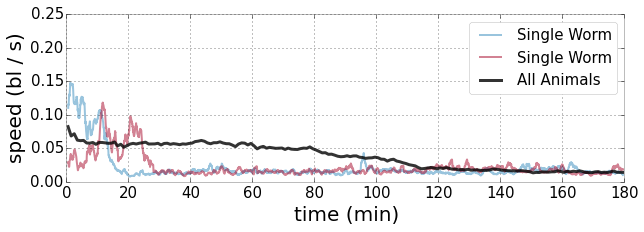

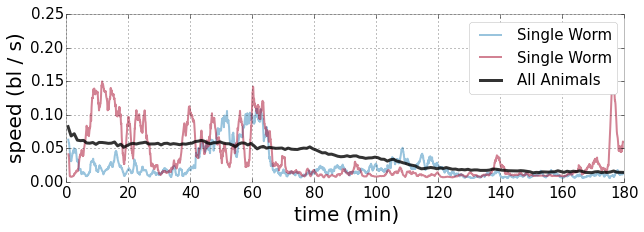

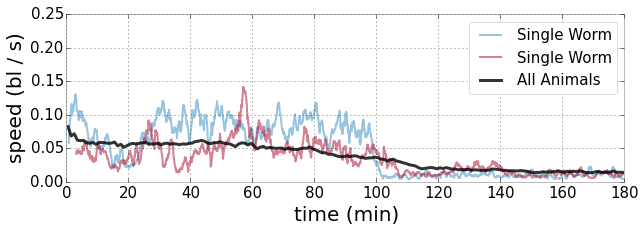

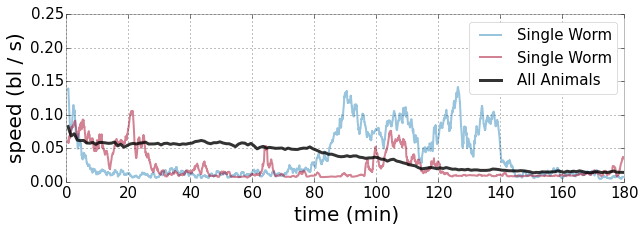

In [238]:
# 15 C groupings

cats15 = {
'000' : [
    '20150615_170754-24',
    
    ],
'001' : [
        ],
'010' : [
    '20150518_121809-26',
    '20150615_170747-6',
    '20150518_121809-37',
        ],
'020' : [
    '20150625_180232-11',
    '20150625_180232-4',      
    '20150625_180237-7',
    '20150625_180237-6',
        ],
    
    
'030' : [
    '20150625_180237-9',
        ],
'040' : [
    '20150625_180232-3',
    '20150518_121809-4',   
        ],
    
'060':[
    '20150615_170754-4', 
    '20150625_180237-10', 
    '20150518_121757-2',
    '20150625_180237-31',
        
    ],
'080' : [
    '20150615_170759-2',
    '20150615_170747-4',
    '20150615_170759-14',
    '20150625_180237-1',
    '20150518_121757-21',
    ],
    
    
'100' : [
    '20150518_121757-16',
    '20150615_170754-66',   
    '20150615_170754-184',  
    '20150615_170747-1',
    '20150625_180237-11',
    '20150615_170754-8',
    '20150518_121809-6',
    '20150615_170759-38',
        
    ],
'120' : [
    '20150615_170759-1',
    '20150615_170759-6',
    ],
'140': [
    '20150615_170754-183',    
    '20150615_170747-5',
    ],
    
    
'160' : [
    '20150615_170759-4',   
    '20150615_170754-7',
        
    ],    
    
'switches' : [
    '20150615_170747-5',
    '20150625_180237-6',
    ],
}

print(' ----   15 C ---- ')
avg=avg15
cats=cats15
dfs = dfs_15

# for i in cats:
#     print(i)
#     for tid in cats[i]:
#         print tid, tid in long_tracks_15



track_list = [dfs[t_id] for t_id in cats['020'][:2]]
plot_tracks(track_list, avg=avg, savename='samp-15C-1.png')   

track_list = [dfs[t_id] for t_id in cats['060'][:2]]
plot_tracks(track_list, avg=avg, savename='samp-15C-2.png')    

track_list = [dfs[t_id] for t_id in cats['100'][:2]]
plot_tracks(track_list, avg=avg, savename='samp-15C-3.png')    

track_list = [dfs[t_id] for t_id in cats['switches'][:2]]
plot_tracks(track_list, avg=avg, savename='samp-15C-4.png')

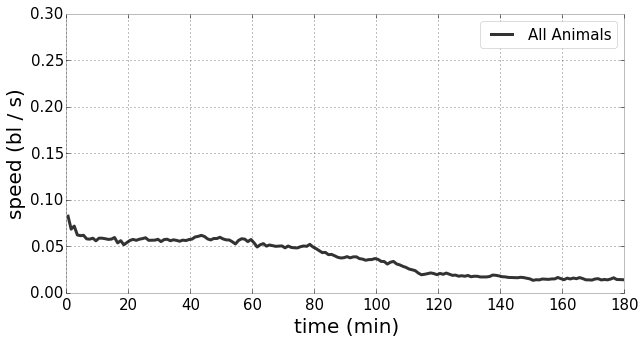

In [164]:
#j = 0
j += 1
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(axisbg='white')

for i, track in enumerate(long_track_ids[:]):
    if i != j:
        continue
    #if track not in t30: continue
        
    print track
    df = track_dfs[track]
    df2 = pd.rolling_mean(df, window=60)
    ax.plot(df2['minutes'], df2['bl / s'], '-', alpha=0.5, label='Single Worm')


    
x = np.array(avg.index) + 0.5
y = np.array(avg)
ax.plot(x, y, '-', alpha=0.8, lw=3, label="All Animals", color='k')

#ax.plot(x, y, 'o', alpha=0.8, label="All Animals -- Binned Data", color='tomato')
#ax.plot(x, expon_func(x, *params), '-', lw=4, label="All Animals -- Fitted Curve", color='k',)
#ax.plot(x, y, 'o', alpha=0.8, color='tomato')

ax.set_ylim([0, .30])
legend = ax.legend(fontsize=15)
frame = legend.get_frame()
frame.set_facecolor('white')
ax.set_xlabel('time (min)', size=20)
ax.set_ylabel('speed (bl / s)', size=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.savefig('15C-{catagory}.png'.format(catagory=c))
plt.show()


# Break

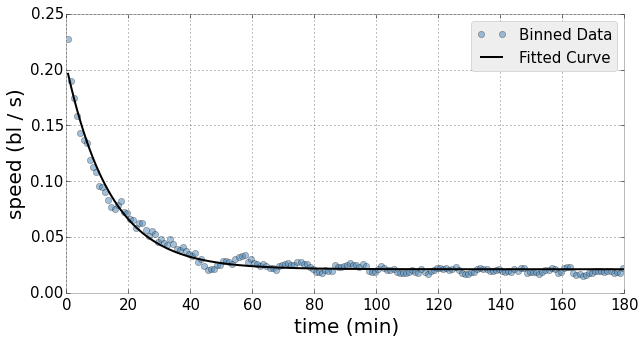

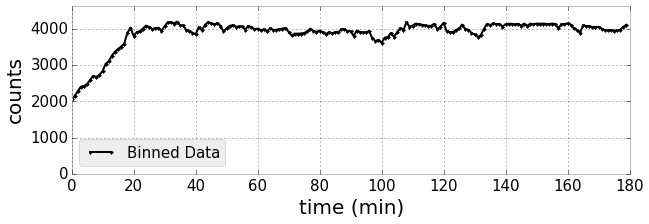

[[  6.13426511e-06   2.37422180e-06   8.42735202e-10]
 [  2.37422180e-06   2.25657895e-06   2.74679187e-07]
 [  8.42735202e-10   2.74679187e-07   1.77425206e-07]]

a * np.exp(-b * x) + c
a = 0.181
b = 0.07
c = 0.021

tau = 1/b = 14.267 minutes

previously reported tau is 19 min - Yemini, Jucikas, ... Schafer (2013)


In [88]:
def expon_func(x, a, b, c):
    return a * np.exp(-b * x) + c

def fit_decay_time(track_dfs, plot=True, savename=None):

    def expon_func(x, a, b, c):
        return a * np.exp(-b * x) + c

    # assemble all dataframes into one big df.
    full_data = [df for bid, 
                 df in track_dfs.items()]
    fdf = pd.concat(full_data, axis=0)
    fdf['m'] = np.array(fdf['minutes'], dtype=int)

    avg = pd.pivot_table(fdf, values='bl / s', columns='m', aggfunc=np.mean)
    counts = pd.pivot_table(fdf, values='bl / s', columns='m', aggfunc=len)

    x = np.array(avg.index) + 0.5
    y = np.array(avg)

    params, pcov = curve_fit(expon_func, x, y)

    if plot:

        #### Exponential Decay Plot ####
        fig = plt.figure(figsize=(10,5))
        ax = plt.subplot(axisbg='white')
        #ax.plot(fdf['minutes'], fdf['bl / s'], '.', alpha=0.1, label="Origional Data")
        ax.plot(x, y, 'o', label="Binned Data", color='steelblue', alpha=0.5)
        ax.plot(x, expon_func(x, *params), '-', color='k', label="Fitted Curve")
        #ax.set_ylim([0, 0.2])
        ax.legend(fontsize=15)
        ax.set_xlabel('time (min)', size=20)
        ax.set_ylabel('speed (bl / s)', size=20)
        plt.yticks(fontsize=15)
        plt.xticks(fontsize=15)
        if savename is not None:
            plt.savefig(savename)
        plt.show()

        
        #### Counts Plot ####
        fig = plt.figure(figsize=(10,3))
        ax = plt.subplot(axisbg='white')
        #fig, ax = plt.subplots(figsize=(10,3))
        x = np.array(counts.index)
        y = np.array(counts)

        ax.plot(x, y, 'k.-', label="Binned Data")
        ax.legend(loc='best', fontsize=15)
        ax.set_xlabel('time (min)', size=20)
        ax.set_ylabel('counts', size=20)
        ax.set_ylim([0, max(y)*1.1])

        plt.yticks(fontsize=15)
        plt.xticks(fontsize=15)

        plt.show()
    return fdf, params, pcov

def plot_decay(track_dfs):
    fdf, params, pcov = fit_decay_time(track_dfs)
    print(pcov)
    print
    print('a * np.exp(-b * x) + c')
    a,b,c = params
    print 'a = {a}'.format(a=round(a, 3))
    print 'b = {b}'.format(b=round(b, 3))
    print 'c = {c}'.format(c=round(c, 3))
    tau = 1/b
    print 
    print 'tau = 1/b = {t} minutes'.format(t=round(tau, 3))
    print 
    print 'previously reported tau is 19 min - Yemini, Jucikas, ... Schafer (2013)'
    return params
    
#track_dfs = d1_NQ67_tracks
#track_dfs = day_1_eids
params = plot_decay(dfs_full)

In [27]:
track_ids

['20150622_121935-576',
 '20150622_121940-2952',
 '20150622_121933-3846',
 '20150622_121940-1203',
 '20150622_121940-6043',
 '20150511_160123-109',
 '20150622_121940-3871',
 '20150622_121933-5485',
 '20150622_121940-3819',
 '20150622_121940-16616',
 '20150622_121940-11283',
 '20150622_121940-4221',
 '20150622_121940-4220',
 '20150622_121940-13199',
 '20150622_121940-2654',
 '20150622_121933-741',
 '20150622_121940-4013',
 '20150511_160123-1018',
 '20150622_121935-40',
 '20150622_121933-745',
 '20150622_121940-12924',
 '20150622_121940-16561',
 '20150622_121933-1108',
 '20150511_121317-5',
 '20150511_121317-4',
 '20150511_121317-6',
 '20150622_121940-3024',
 '20150622_121933-23',
 '20150622_121933-2833',
 '20150622_121940-16164',
 '20150622_121940-53',
 '20150608_121725-755',
 '20150622_121940-2059',
 '20150622_121940-3550',
 '20150629_165904-319',
 '20150511_121312-4',
 '20150622_121940-6121',
 '20150702_150024-1307',
 '20150622_121935-178',
 '20150622_121940-12865',
 '20150622_121933-

# Fig 3 A & B

20150622_121935-40


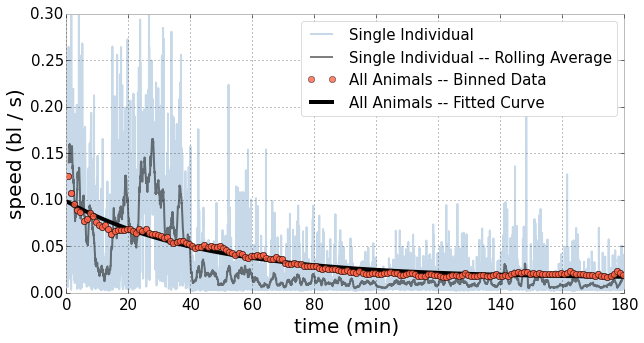

In [21]:
def plot_single_and_global_decay(track_dfs, fdf, params, track_id, save_as='eps'):
    df = track_dfs[track_id]
    df2 = pd.rolling_mean(df, window=60)

    avg = pd.pivot_table(fdf, values='bl / s', columns='m', aggfunc=np.mean)
    counts = pd.pivot_table(fdf, values='bl / s', columns='m', aggfunc=len)

    x = np.array(avg.index) + 0.5
    y = np.array(avg)
    
    fig = plt.figure(figsize=(10,5))
    ax = plt.subplot(axisbg='white')
    #ax.plot(fdf['minutes'], fdf['bl / s'], '.', alpha=0.1, label="Origional Data")
    #ax.plot(df['minutes'], df['bl / s'], '.', alpha=0.5, label='single worm') #, color='steelblue'

    ax.plot(df['minutes'], df['bl / s'], '-', alpha=0.3, label='Single Individual', color='steelblue')
    ax.plot(df2['minutes'], df2['bl / s'], '-', alpha=0.5, label='Single Individual -- Rolling Average', color='k')

    ax.plot(x, y, 'o', alpha=0.8, label="All Animals -- Binned Data", color='tomato')
    ax.plot(x, expon_func(x, *params), '-', lw=4, label="All Animals -- Fitted Curve", color='k',)
    ax.plot(x, y, 'o', alpha=0.8, color='tomato')


    ax.set_ylim([0, .30])
    legend = ax.legend(fontsize=15)
    frame = legend.get_frame()
    frame.set_facecolor('white')
    #frame.set_edgecolor('red')

    ax.set_xlabel('time (min)', size=20)
    ax.set_ylabel('speed (bl / s)', size=20)
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    if save_as is not None:
        savename = 'single_global_decay-{t}.{sa}'.format(t=track_id, sa=save_as)
        plt.savefig(savename)
    plt.show()
    
track_dfs = dfs_full
track_ids = list(dfs_full.keys())

full_data = [df for bid, 
             df in track_dfs.items()]
fdf = pd.concat(full_data, axis=0)
fdf['m'] = np.array(fdf['minutes'], dtype=int)



        
    track_id = track
    print(track_id)
    plot_single_and_global_decay(track_dfs, fdf, params, track_id, save_as='png')
    break

('mid_burst', [5, 20, 22, 23])


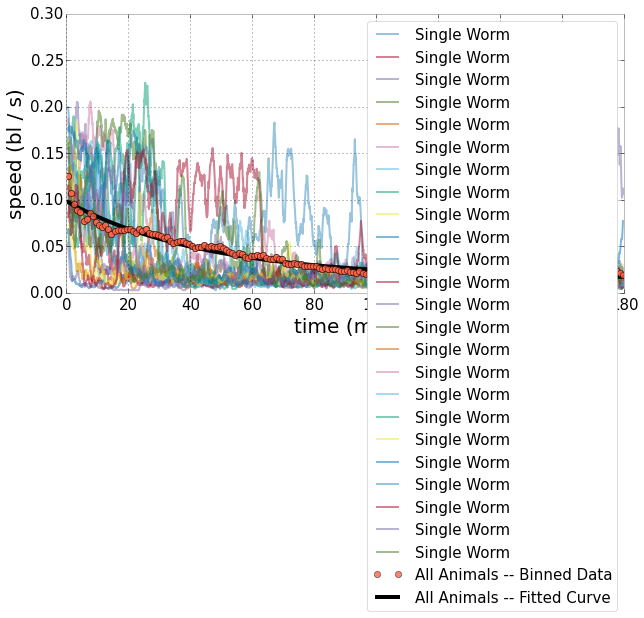

In [25]:



ids = []

decay = [3, 6, 10, 15, 16, 0 ]
dropoff = [7, 18, 13, 4, 14, 17, 18, 19, 21, 23]
start_high = [10] #[0, 1, 3, 4, 6, 7, 10, 13, 14, 15]
end_high = [2, 12]
mid_burst = [5, 20, 22, 23]
all_low = [8, 9, 1, 11]

catagories = {'decay': decay,
              'dropoff': dropoff,
              'end_high': end_high,
              'mid_burst': mid_burst,
              'all_low': all_low,}

for c, clist in catagories.items():
    print(c, clist)
    
    fig = plt.figure(figsize=(10,5))
    ax = plt.subplot(axisbg='white')
    

    
    
    for i, track in enumerate(track_ids[:]):
    #         if i not in clist[:2]: #dropoff: #decay:
    #             continue
        df = track_dfs[track]



        x = np.array(avg.index) + 0.5
        y = np.array(avg)

        #print('track: {bid} \t| len:{l}'.format(bid=track, l=len(df)))
        #fig = plt.figure(figsize=(10, 1))
        start_time, end_time = min(df['minutes']), max(df['minutes'])
        #print(start_time, end_time)
        if end_time - start_time < 160:
            continue
        if start_time > 10:
            continue
        s = df['bl / s']
        if max(s) < 0.05:
            continue

        df2 = pd.rolling_mean(df, window=60)
        ax.plot(df2['minutes'], df2['bl / s'], '-', alpha=0.5, label='Single Worm')

        track_id = track
        if track_id not in ids:
            ids.append(track_id)
        #plot_single_and_global_decay(track_dfs, fdf, params, track_id, save_as='png')


        
    
    ax.plot(x, y, 'o', alpha=0.8, label="All Animals -- Binned Data", color='tomato')
    ax.plot(x, expon_func(x, *params), '-', lw=4, label="All Animals -- Fitted Curve", color='k',)
    ax.plot(x, y, 'o', alpha=0.8, color='tomato')
        
    ax.set_ylim([0, .30])
    legend = ax.legend(fontsize=15)
    frame = legend.get_frame()
    frame.set_facecolor('white')
    ax.set_xlabel('time (min)', size=20)
    ax.set_ylabel('speed (bl / s)', size=20)
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    plt.savefig('20C-{catagory}.png'.format(catagory=c))
    plt.show()
    break

[4, 9]


NameError: name 'x' is not defined

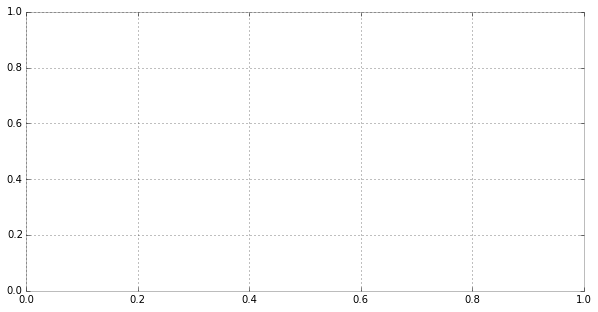

In [18]:
track_dfs = dfs_full
track_ids = list(dfs.keys())

full_data = [df for bid, 
             df in track_dfs.items()]
fdf = pd.concat(full_data, axis=0)
fdf['m'] = np.array(fdf['minutes'], dtype=int)



#ds = []
cats = {
#'000' : [8],
'001' : [4, 9],
#'010' : [1, 18],
'020' : [3, 10, 11, 13, 15, 16, 19, 21],
#'030' : [7, 17],
'040' : [0, 14],
#'060' : [6, 20, 23],
'100' : [22, 20],
'120' : [5, 2],
#'500' : [2, 12],
}



avg = pd.pivot_table(fdf, values='bl / s', columns='m', aggfunc=np.mean)
counts = pd.pivot_table(fdf, values='bl / s', columns='m', aggfunc=len)    


for cat in sorted(cats):
    c = cats[cat]
    print(c)
    fig = plt.figure(figsize=(10,5))
    ax = plt.subplot(axisbg='white')
    ax.plot(x, y, 'o', alpha=0.8, label="All Animals -- Binned Data", color='tomato')
    ax.plot(x, expon_func(x, *params), '-', lw=4, label="All Animals -- Fitted Curve", color='k',)
    ax.plot(x, y, 'o', alpha=0.8, color='tomato')
    
    
    for i, track in enumerate(ids[:]):
        if i not in c[:2]: #dropoff: #decay:
            continue
        df = track_dfs[track]

        x = np.array(avg.index) + 0.5
        y = np.array(avg)

        #print('track: {bid} \t| len:{l}'.format(bid=track, l=len(df)))
        #fig = plt.figure(figsize=(10, 1))
        start_time, end_time = min(df['minutes']), max(df['minutes'])
        #print(start_time, end_time)
        if end_time - start_time < 160:
            continue
        if start_time > 10:
            continue
        s = df['bl / s']
        if max(s) < 0.05:
            continue


        df2 = pd.rolling_mean(df, window=60)
        ax.plot(df2['minutes'], df2['bl / s'], '-', alpha=0.5, label='Single Worm')

        track_id = track
        if track_id not in ids:
            ids.append(track_id)
        #plot_single_and_global_decay(track_dfs, fdf, params, track_id, save_as='png')
  
    ax.set_ylim([0, .30])
    legend = ax.legend(fontsize=15)
    frame = legend.get_frame()
    frame.set_facecolor('white')
    ax.set_xlabel('time (min)', size=20)
    ax.set_ylabel('speed (bl / s)', size=20)
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    plt.savefig('excitability-{catagory}.png'.format(catagory=cat))
    plt.show()
